# Credit Card Fraud Data Analysis Project

**Important:** This credit card fraud dataset is an inbalanced dataset.

## Import Library and Dataset

In [1]:
! pip install kaggle

In [2]:
! pip install lightgbm

In [3]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [4]:
! kaggle datasets list

ref                                                  title                                    size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  --------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                   Vehicle Sales Data                       19MB  2024-02-21 20:16:17           9693        175  1.0              
arnavvvvv/spotify-music                              Top Spotify Songs                        47KB  2024-03-06 05:20:29           1546         32  1.0              
tarunrm09/climate-change-indicators                  Climate change Indicators                34KB  2024-02-22 08:53:54           5017        110  1.0              
arnavvvvv/netflix-movies-and-tv-shows                Netflix Movies and TV Shows               1MB  2024-03-04 15:49:29           1851         44  1.0              
zain280/da

In [5]:
! kaggle datasets download mlg-ulb/creditcardfraud

 74% 49.0M/66.0M [00:00<00:00, 69.7MB/s]
100% 66.0M/66.0M [00:00<00:00, 85.7MB/s]


In [6]:
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# For plotting metrics

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Scaler
from sklearn.preprocessing import MinMaxScaler

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# For classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# For computing performance metric
from time import process_time

# Import pipeline
from sklearn.pipeline import Pipeline

# Splitting data for train test
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
pd.set_option('display.max_columns', None) #Display all collumns
df = pd.read_csv("/content/creditcard.csv")
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9       V10       V11       V12  \
0       0.462388  0.239599  0.098698  0.363787  0.09079

## Preprocessing

In [9]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


For this experiment, the data classification performance will be compared when normalized and not normalized. The classification will be done in several algorithms, such as random forest, XGBoost, and other classifiers such as LightGBM in terms of speed.

In [10]:
# Normalized df

scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(df)
df_norm = scaler.transform(df)
print(df_norm)

            Time        V1        V2        V3        V4        V5        V6  \
0       0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1       0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
2       0.000006  0.935217  0.753118  0.868141  0.268766  0.762329  0.281122   
3       0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4       0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.999965  0.756448  0.873531  0.666991  0.160317  0.729603  0.236810   
284803  0.999971  0.945845  0.766677  0.872678  0.219189  0.771561  0.273661   
284804  0.999977  0.990905  0.764080  0.781102  0.227202  0.783425  0.293496   
284805  0.999977  0.954209  0.772856  0.849587  0.282508  0.763172  0.269291   
284806  1.000000  0.949232  0.765256  0.849601  0.229488  0.765632  0.256488   

              V7        V8        V9   

In [11]:
# separating the data for analysis
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

legitNorm = df_norm[df_norm['Class'] == 0]
fraudNorm = df_norm[df_norm['Class'] == 1]

In [12]:
# Under-Sampling (building sample dataset containing similar distribution of normal transactions and Fraudulent Transactions)
legit_sample = legit.sample(n=492)
# Concatenating two DataFrames
new_df = pd.concat([legit_sample, fraud], axis=0)
# Print first 5 rows of the new dataset
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
210179,137872.0,-0.586675,0.999020,1.368682,-0.873482,0.366876,-0.663596,0.801366,-0.317697,0.466454,-1.199088,-0.337187,0.164634,0.593369,-1.803881,0.420381,0.379260,0.281116,0.202696,-0.310745,-0.005554,-0.208156,-0.412606,-0.131171,-0.123812,-0.368573,-0.329419,-0.292960,-0.064590,2.08,0
60815,49517.0,1.271576,-1.047680,0.558597,-0.936221,-1.089141,0.495688,-1.311593,0.379684,-0.297635,0.777024,0.512193,-1.224357,-1.695273,0.144485,0.955820,1.724878,-0.097857,-0.278388,0.467162,0.042005,0.405903,0.944278,-0.196660,-0.819558,0.350835,0.017268,0.028573,0.006045,49.95,0
79909,58233.0,1.262502,0.342965,-0.033075,1.132830,0.101369,-0.594041,0.356321,-0.248706,0.058142,-0.081851,-0.967441,0.498476,0.569950,0.103455,-0.001719,-0.301272,-0.312807,-0.342211,0.105120,-0.093017,-0.054511,0.023816,-0.226708,-0.080179,0.929772,-0.248507,0.012433,0.011398,12.21,0
59497,48866.0,-1.611352,-2.115130,1.101155,-1.225981,-2.939921,1.508147,1.142300,-0.097312,-2.531945,1.019712,0.935181,-1.456218,-0.555888,-0.143178,1.113912,-0.341928,0.668237,0.995495,0.777961,-0.038385,0.026909,0.429943,0.262103,-0.322089,0.145201,0.117004,0.234844,0.016222,650.00,0
112182,72545.0,-0.289354,0.849668,-0.300183,-1.113168,2.556523,3.260734,0.106543,0.936008,-0.502654,-0.443830,-0.010456,-0.331327,-0.079019,-0.258043,1.098111,0.715071,-0.482240,0.324036,0.282925,0.225793,-0.319196,-1.006614,-0.052198,0.935721,-0.006834,0.088110,0.247446,0.091159,0.99,0


In [13]:
# Under-Sampling (building sample dataset containing similar distribution of normal transactions and Fraudulent Transactions)
legitNorm_sample = legitNorm.sample(n=492)
# Concatenating two DataFrames
new_dfNorm = pd.concat([legitNorm_sample, fraudNorm], axis=0)
# Print first 5 rows of the new dataset
new_dfNorm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
44003,0.241585,0.978116,0.762648,0.839041,0.259533,0.761339,0.258581,0.263953,0.786685,0.486295,0.508166,0.302572,0.684106,0.217819,0.669946,0.292463,0.452048,0.729580,0.661576,0.628933,0.578484,0.558883,0.484571,0.664170,0.384557,0.597277,0.591605,0.414469,0.312838,0.001945,0.0
88882,0.360746,0.970020,0.757130,0.838047,0.248979,0.762314,0.265118,0.265212,0.787125,0.465375,0.504497,0.392597,0.732472,0.404655,0.667493,0.413473,0.446448,0.732529,0.606048,0.525411,0.583931,0.565182,0.516664,0.662845,0.355012,0.579406,0.600451,0.414593,0.313675,0.009731,0.0
75107,0.323522,0.977890,0.761982,0.825090,0.235324,0.767299,0.264183,0.266325,0.784690,0.478803,0.502207,0.190886,0.689520,0.417465,0.653448,0.378594,0.445681,0.728431,0.602077,0.606741,0.581658,0.559775,0.491194,0.660919,0.218880,0.606976,0.683043,0.414049,0.312878,0.004554,0.0
73895,0.320212,0.948665,0.775120,0.857392,0.293973,0.766311,0.254418,0.270334,0.784447,0.447233,0.507983,0.248382,0.687266,0.403000,0.661191,0.418489,0.439860,0.726633,0.667647,0.593784,0.583299,0.563990,0.529682,0.665871,0.432749,0.567742,0.373632,0.423609,0.317857,0.002582,0.0
206071,0.787374,0.949217,0.775411,0.842190,0.272591,0.755976,0.274568,0.252925,0.727323,0.463532,0.474418,0.218046,0.736356,0.439096,0.668202,0.386886,0.405053,0.772197,0.647314,0.797834,0.597231,0.520561,0.563365,0.658390,0.388405,0.652473,0.669514,0.417675,0.316641,0.006231,0.0


In [14]:
# Distribution of legitimate transactions & fraudulent transactions
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [15]:
# Distribution of new legitimate transactions & fraudulent transactions
new_dfNorm['Class'].value_counts()

0.0    492
1.0    492
Name: Class, dtype: int64

As you can see, the data on fraudulent and non-fraudulent is skewed to non-fraudulent. We will need to sample the non-fraudulent data to make the performance of the model better. Now, since the class prediction is balanced, we can proceed to create classsifications on the data

In [16]:
# Check preprocessing and statistics for df
print(new_df.isnull().sum())
print(new_df.describe())
print(new_df.Amount.describe())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
                Time          V1          V2          V3          V4  \
count     984.000000  984.000000  984.000000  984.000000  984.000000   
mean    87915.529472   -2.404586    1.825077   -3.499365    2.306099   
std     47644.313250    5.531014    3.709389    6.237573    3.195051   
min       406.000000  -30.552380  -13.881208  -31.103685   -4.319766   
25%     47817.750000   -2.818742   -0.110046   -5.129049   -0.092982   
50%     80729.000000   -0.747501    0.988853   -1.371674    1.302027   
75%    133103.000000    0.939953    2.777569    0.359563    4.305361   
max    172627.000000    2.336191   22.0

In [17]:
# Check preprocessing and statistics for normalized df
print(new_dfNorm.isnull().sum())
print(new_dfNorm.describe())
print(new_dfNorm.Amount.describe())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
             Time          V1          V2          V3          V4          V5  \
count  984.000000  984.000000  984.000000  984.000000  984.000000  984.000000   
mean     0.498376    0.917130    0.785797    0.777202    0.354829    0.755140   
std      0.274813    0.093336    0.039624    0.108168    0.140276    0.028440   
min      0.001632    0.439247    0.638193    0.298431    0.079918    0.616903   
25%      0.266724    0.908589    0.765815    0.749298    0.250633    0.753577   
50%      0.447987    0.944417    0.777148    0.814548    0.314480    0.762797   
75%      0.755949    0.975078    0.796791    0.8

The normalized and non-normalized data can be seen above. It can be seen that the data above doesn't have any nulls. But, the normalized data statistics are much more uniform, compared to the regular data. We will analyze the effect of normalization for each classification method that will be done.

## Data Split

In [18]:
# Raw data
X = new_df.drop(columns = ["Class"])
y = new_df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalized data
X_norm = new_dfNorm.drop(columns = ["Class"])
y_norm = new_dfNorm["Class"]
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

In [19]:
# Check whether the data is splitted in 80:20 ratio
print(X.shape, X_train.shape, X_test.shape)
print(X_norm.shape, X_train_norm.shape, X_test_norm.shape)

(984, 30) (787, 30) (197, 30)
(984, 30) (787, 30) (197, 30)


## Classifier Predictions

#### Random Forest Classifier

##### Regular Data Random Forest Classifier

In [20]:
model = RandomForestClassifier(random_state=42)

In [21]:
# Create a pipeline for each model
pipeline = Pipeline([
    ('model', model)
    ])

# Perform cross-validation
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy = scores.mean()

# Fit the pipeline on the training data
start = process_time()
pipeline.fit(X_train, y_train)
end = process_time()
rf_clf_time = end-start

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Model:", RandomForestClassifier())
print("Fit runtime:", rf_clf_time)
print("Cross-validation Accuracy:", mean_accuracy)
print("Test Accuracy:", accuracy)
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

best_model = pipeline

# save the best model
import pickle
pickle.dump(best_model, open('regular.dot', 'wb'))

Model: RandomForestClassifier()
Fit runtime: 0.5839069630000004
Cross-validation Accuracy: 0.9351689107473998
Test Accuracy: 0.9289340101522843
Recall Score:  0.8775510204081632
Precision Score:  0.9772727272727273
F1 Score:  0.9247311827956989


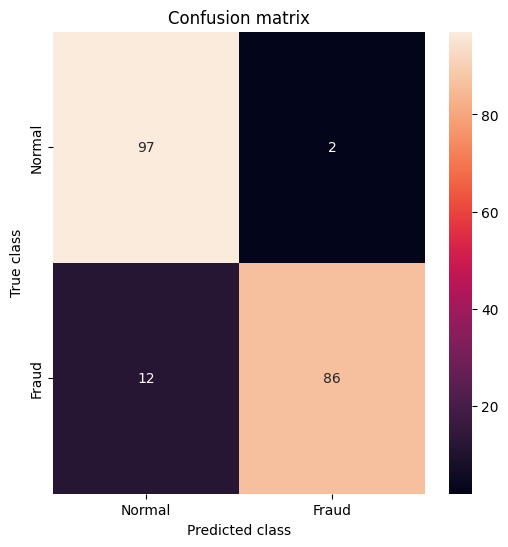

In [22]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

##### Normalized Data Random Forest Classifier

In [23]:
# X_train_norm, X_test_norm, y_train_norm, y_test_norm

model = RandomForestClassifier(random_state=42)

In [24]:
# Create a pipeline for each model
pipelineNorm = Pipeline([
    ('model', model)
    ])

# Perform cross-validation
scores_norm = cross_val_score(pipelineNorm, X_train_norm, y_train_norm, cv=5)

# Calculate mean accuracy
mean_accuracy_norm = scores_norm.mean()

# Fit the pipeline on the training data
start = process_time()
pipelineNorm.fit(X_train_norm, y_train_norm)
end = process_time()
rf_clf_time_norm = end - start

# Make predictions on the test data
y_pred_norm = pipelineNorm.predict(X_test_norm)

# Calculate accuracy score
accuracy_norm = accuracy_score(y_test_norm, y_pred_norm)

print("Model:", RandomForestClassifier())
print("Fit runtime:", rf_clf_time_norm)
print("Cross-validation Accuracy:", mean_accuracy_norm)
print("Test Accuracy:", accuracy_norm)
print('Recall Score: ', recall_score(y_test_norm, y_pred_norm))
print('Precision Score: ', precision_score(y_test_norm, y_pred_norm))
print('F1 Score: ', f1_score(y_test_norm, y_pred_norm))

best_modelNorm = pipelineNorm

# save the best model
import pickle
pickle.dump(best_modelNorm, open('normalized.dot', 'wb'))

Model: RandomForestClassifier()
Fit runtime: 0.39144268699999785
Cross-validation Accuracy: 0.9390066919293719
Test Accuracy: 0.9238578680203046
Recall Score:  0.8877551020408163
Precision Score:  0.9560439560439561
F1 Score:  0.9206349206349207


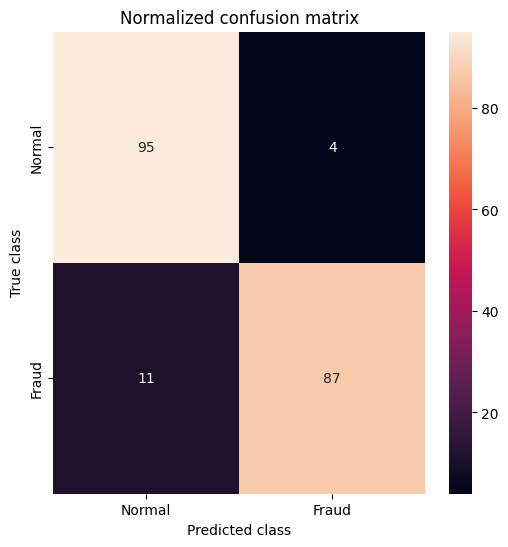

In [25]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_norm = confusion_matrix(y_test_norm, y_pred_norm)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_norm, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Normalized confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

As you can see, both approach can perform well in the sampled data.

##### All Data Prediction

In [26]:
# Raw data
X_all = df.drop(columns = ["Class"])
y_all = df["Class"]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.99, random_state=42)

# Normalized data
X_norm_all = df_norm.drop(columns = ["Class"])
y_norm_all = df_norm["Class"]
X_train_norm_all, X_test_norm_all, y_train_norm_all, y_test_norm_all = train_test_split(X_norm_all, y_norm_all, test_size=0.99, random_state=42)

In [27]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_all = pipeline.predict(X_test_all)

# Calculate accuracy score
accuracy_all = accuracy_score(y_test_all, y_pred_all)

print("Model:", RandomForestClassifier())
print("Test Accuracy:", accuracy_all)
print('Recall Score: ', recall_score(y_test_all, y_pred_all))
print('Precision Score: ', precision_score(y_test_all, y_pred_all))
print('F1 Score: ', f1_score(y_test_all, y_pred_all))


Model: RandomForestClassifier()
Test Accuracy: 0.9773761433399891
Recall Score:  0.9754601226993865
Precision Score:  0.06969608416130918
F1 Score:  0.1300968225828447


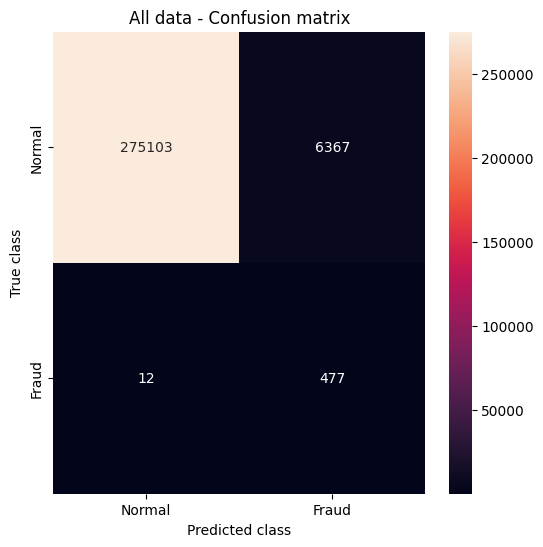

In [28]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_all = confusion_matrix(y_test_all, y_pred_all)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [29]:
# X_train_norm, X_test_norm, y_train_norm, y_test_norm

model = RandomForestClassifier(random_state=42)

In [30]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_norm_all = pipelineNorm.predict(X_test_norm_all)

# Calculate accuracy score
accuracy_norm_all = accuracy_score(y_test_norm_all, y_pred_norm_all)

print("Model:", RandomForestClassifier())
print("Test Accuracy:", accuracy_norm_all)
print('Recall Score: ', recall_score(y_test_norm_all, y_pred_norm_all))
print('Precision Score: ', precision_score(y_test_norm_all, y_pred_norm_all))
print('F1 Score: ', f1_score(y_test_norm_all, y_pred_norm_all))


Model: RandomForestClassifier()
Test Accuracy: 0.9708787447820427
Recall Score:  0.9775051124744376
Precision Score:  0.05508181608665591
F1 Score:  0.10428711683211518


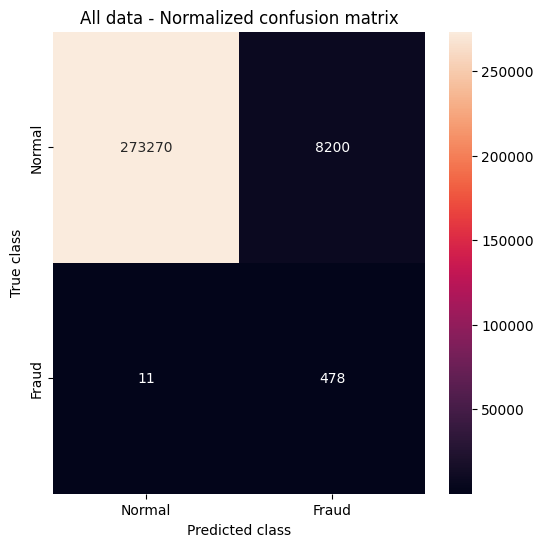

In [31]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_norm_all = confusion_matrix(y_test_norm_all, y_pred_norm_all)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_norm_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Normalized confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

When the model is tested to all the dataset, we will see a significant amount of error in the false positives. This is especially true since the model is trained only to a sample of the total dataset. You can train using all the dataset to create a better prediction.

#### Decision Tree Classifier

##### Decision Tree Classifier Regular Data Prediction

In [32]:
model = DecisionTreeClassifier()

In [33]:
# Create a pipeline for each model
decisiontree = Pipeline([
    ('model', model)
    ])

# Perform cross-validation
scores_dt = cross_val_score(decisiontree, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy_dt = scores_dt.mean()

# Fit the pipeline on the training data
start = process_time()
decisiontree.fit(X_train, y_train)
end = process_time()
dt_clf_time = end - start

# Make predictions on the test data
y_pred_dt = decisiontree.predict(X_test)

# Calculate accuracy score
accuracy_dt = accuracy_score(y_test, y_pred)

print("Model:", DecisionTreeClassifier())
print("Fit runtime:", dt_clf_time)
print("Cross-validation Accuracy:", mean_accuracy_dt)
print("Test Accuracy:", accuracy_dt)
print('Recall Score: ', recall_score(y_test, y_pred_dt))
print('Precision Score: ', precision_score(y_test, y_pred_dt))
print('F1 Score: ', f1_score(y_test, y_pred_dt))

best_dt = decisiontree

# save the best model
import pickle
pickle.dump(best_dt, open('decisionregular.dot', 'wb'))

Model: DecisionTreeClassifier()
Fit runtime: 0.026431583000000813
Cross-validation Accuracy: 0.9009030073369345
Test Accuracy: 0.9289340101522843
Recall Score:  0.8877551020408163
Precision Score:  0.925531914893617
F1 Score:  0.90625


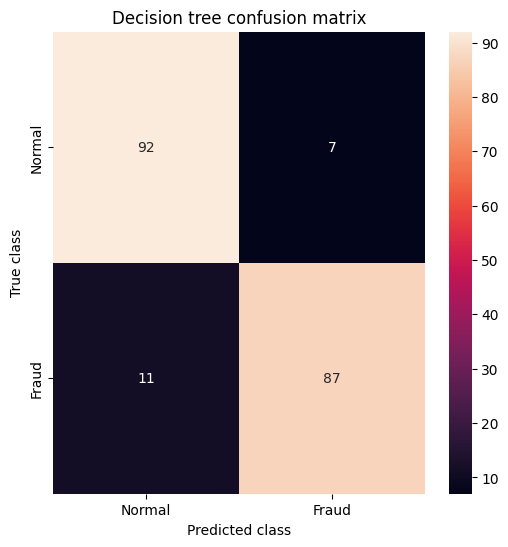

In [34]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_dt, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Decision tree confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [35]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_dt_all = decisiontree.predict(X_test_all)

# Calculate accuracy score
accuracy_dt_all = accuracy_score(y_test_all, y_pred_dt_all)

print("Model:", DecisionTreeClassifier())
print("Test Accuracy:", accuracy_dt_all)
print('Recall Score: ', recall_score(y_test_all, y_pred_dt_all))
print('Precision Score: ', precision_score(y_test_all, y_pred_dt_all))
print('F1 Score: ', f1_score(y_test_all, y_pred_dt_all))


Model: DecisionTreeClassifier()
Test Accuracy: 0.9140442404746789
Recall Score:  0.9775051124744376
Precision Score:  0.01934987653321459
F1 Score:  0.03794855509685614


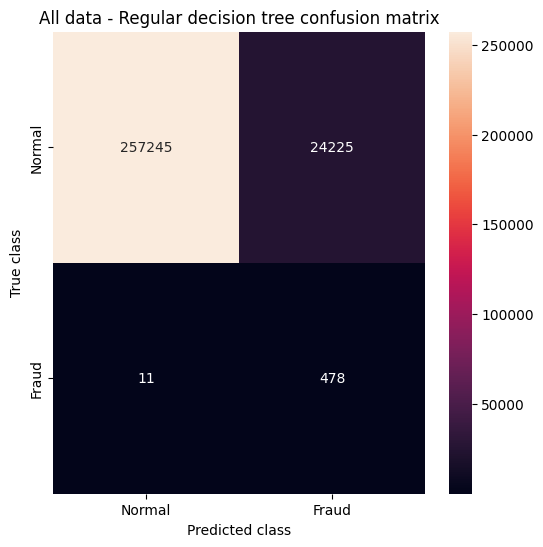

In [36]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_norm_all = confusion_matrix(y_test_all, y_pred_dt_all)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_norm_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Regular decision tree confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

##### Decision Tree Classifier Normalized Data Prediction

In [37]:
# Create a pipeline for each model
decisiontreeNorm = Pipeline([
    ('model', model)
    ])

# Perform cross-validation
scores_dt_norm = cross_val_score(decisiontreeNorm, X_train_norm, y_train_norm, cv=5)

# Calculate mean accuracy
mean_accuracy_dt_norm = scores_dt_norm.mean()

# Fit the pipeline on the training data
start = process_time()
decisiontreeNorm.fit(X_train_norm, y_train_norm)
end = process_time()
dt_clf_time_norm = end - start

# Make predictions on the test data
y_pred_dt_norm = decisiontreeNorm.predict(X_test_norm)

# Calculate accuracy score
accuracy_dt_norm = accuracy_score(y_test_norm, y_pred_norm)

print("Model:", DecisionTreeClassifier())
print("Fit runtime:", dt_clf_time_norm)
print("Cross-validation Accuracy:", mean_accuracy_dt_norm)
print("Test Accuracy:", accuracy_dt_norm)
print('Recall Score: ', recall_score(y_test_norm, y_pred_dt_norm))
print('Precision Score: ', precision_score(y_test_norm, y_pred_dt_norm))
print('F1 Score: ', f1_score(y_test_norm, y_pred_dt_norm))

best_dt_norm = decisiontreeNorm

# save the best model
import pickle
pickle.dump(best_dt_norm, open('decisionNorm.dot', 'wb'))

Model: DecisionTreeClassifier()
Fit runtime: 0.026322590999999562
Cross-validation Accuracy: 0.9123196000967508
Test Accuracy: 0.9238578680203046
Recall Score:  0.8775510204081632
Precision Score:  0.8775510204081632
F1 Score:  0.8775510204081631


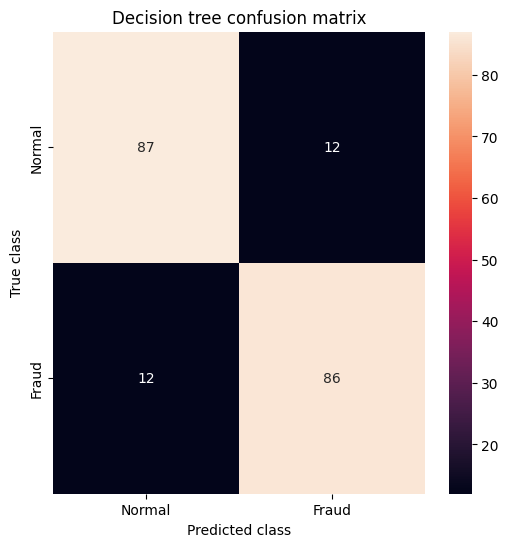

In [38]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_dt_norm = confusion_matrix(y_test_norm, y_pred_dt_norm)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_dt_norm, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Decision tree confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [39]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_dt_all_norm = decisiontreeNorm.predict(X_test_norm_all)

# Calculate accuracy score
accuracy_dt_all_norm = accuracy_score(y_test_norm_all, y_pred_dt_all_norm)

print("Model:", DecisionTreeClassifier())
print("Test Accuracy:", accuracy_dt_all)
print('Recall Score: ', recall_score(y_test_norm_all, y_pred_dt_all_norm))
print('Precision Score: ', precision_score(y_test_norm_all, y_pred_dt_all_norm))
print('F1 Score: ', f1_score(y_test_norm_all, y_pred_dt_all_norm))


Model: DecisionTreeClassifier()
Test Accuracy: 0.9140442404746789
Recall Score:  0.9754601226993865
Precision Score:  0.01444141689373297
F1 Score:  0.028461469614248634


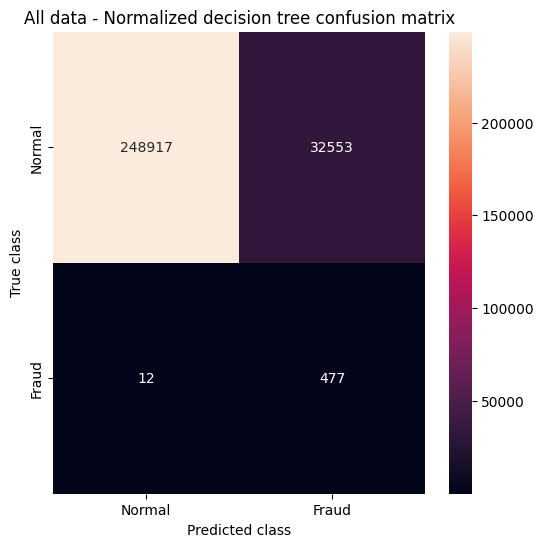

In [40]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_dt_norm_all = confusion_matrix(y_test_norm_all, y_pred_dt_all_norm)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_dt_norm_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Normalized decision tree confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### Gradient Boosting Classifier

##### Regular Data Gradient Boost Classifier

In [41]:
gbmodel = GradientBoostingClassifier()

In [42]:
# Create a pipeline for each model
gradientboost = Pipeline([
    ('model', gbmodel)
    ])

# Perform cross-validation
scores_gb = cross_val_score(gradientboost, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy_gb = scores_gb.mean()

# Fit the pipeline on the training data
start = process_time()
gradientboost.fit(X_train, y_train)
end = process_time()
gb_clf_time = end - start

# Make predictions on the test data
y_pred_gb = gradientboost.predict(X_test)

# Calculate accuracy score
accuracy_gb = accuracy_score(y_test, y_pred)

print("Model:", GradientBoostingClassifier())
print("Fit runtime:", gb_clf_time)
print("Cross-validation Accuracy:", mean_accuracy_gb)
print("Test Accuracy:", accuracy_gb)
print('Recall Score: ', recall_score(y_test, y_pred_gb))
print('Precision Score: ', precision_score(y_test, y_pred_gb))
print('F1 Score: ', f1_score(y_test, y_pred_gb))

best_gb = gradientboost

# save the best model
import pickle
pickle.dump(best_gb, open('gbregular.dot', 'wb'))

Model: GradientBoostingClassifier()
Fit runtime: 1.232151842999997
Cross-validation Accuracy: 0.9377086188825284
Test Accuracy: 0.9289340101522843
Recall Score:  0.8979591836734694
Precision Score:  0.967032967032967
F1 Score:  0.9312169312169313


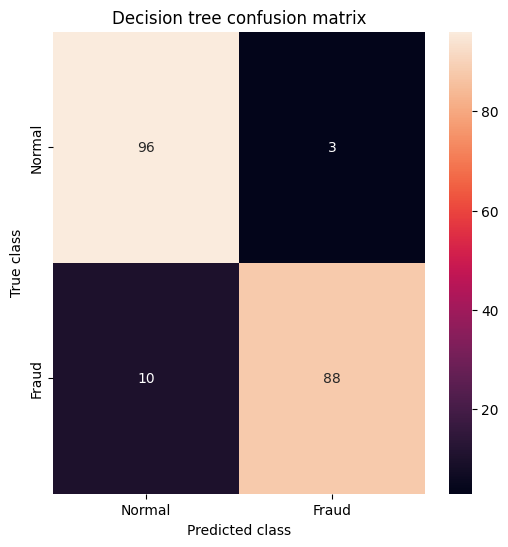

In [43]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_gb, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Decision tree confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [44]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_gb_all = gradientboost.predict(X_test_all)

# Calculate accuracy score
accuracy_gb_all = accuracy_score(y_test_all, y_pred_gb_all)

print("Model:", GradientBoostingClassifier())
print("Test Accuracy:", accuracy_gb_all)
print('Recall Score: ', recall_score(y_test_all, y_pred_gb_all))
print('Precision Score: ', precision_score(y_test_all, y_pred_gb_all))
print('F1 Score: ', f1_score(y_test_all, y_pred_gb_all))


Model: GradientBoostingClassifier()
Test Accuracy: 0.9654346908593093
Recall Score:  0.9795501022494888
Precision Score:  0.046891825746451295
F1 Score:  0.08949925261584454


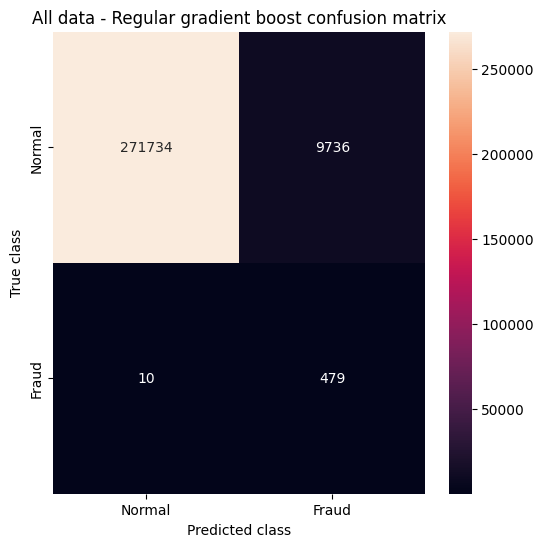

In [45]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_norm_all = confusion_matrix(y_test_all, y_pred_gb_all)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_norm_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Regular gradient boost confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


##### Normalized Data Gradient Boost Classifier

In [46]:
# Create a pipeline for each model
gradientboostNorm = Pipeline([
    ('model', gbmodel)
    ])

# Perform cross-validation
scores_gb_norm = cross_val_score(gradientboostNorm, X_train_norm, y_train_norm, cv=5)

# Calculate mean accuracy
mean_accuracy_gb_norm = scores_gb_norm.mean()

# Fit the pipeline on the training data
start = process_time()
gradientboostNorm.fit(X_train_norm, y_train_norm)
end = process_time()
gb_clf_time_norm = end - start

# Make predictions on the test data
y_pred_gb_norm = gradientboostNorm.predict(X_test_norm)

# Calculate accuracy score
accuracy_gb_norm = accuracy_score(y_test_norm, y_pred_norm)

print("Model:", GradientBoostingClassifier())
print("Fit runtime:", gb_clf_time_norm)
print("Cross-validation Accuracy:", mean_accuracy_gb_norm)
print("Test Accuracy:", accuracy_gb_norm)
print('Recall Score: ', recall_score(y_test_norm, y_pred_gb_norm))
print('Precision Score: ', precision_score(y_test_norm, y_pred_gb_norm))
print('F1 Score: ', f1_score(y_test_norm, y_pred_gb_norm))

best_gb_norm = gradientboostNorm

# save the best model
import pickle
pickle.dump(best_gb_norm, open('gbNorm.dot', 'wb'))

Model: GradientBoostingClassifier()
Fit runtime: 0.9463051940000042
Cross-validation Accuracy: 0.9364831089252601
Test Accuracy: 0.9238578680203046
Recall Score:  0.8979591836734694
Precision Score:  0.9263157894736842
F1 Score:  0.911917098445596


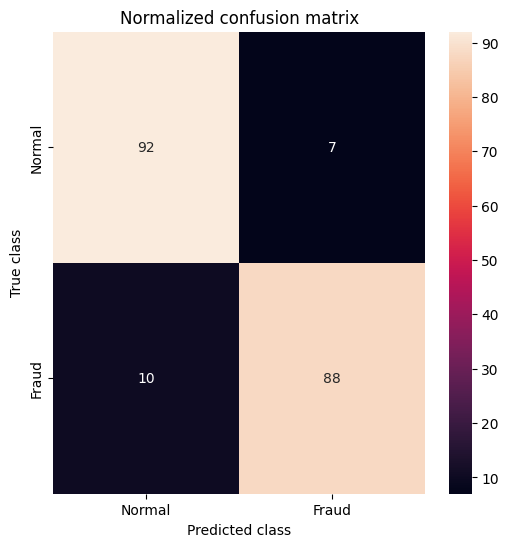

In [47]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_gb_norm = confusion_matrix(y_test_norm, y_pred_gb_norm)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_gb_norm, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Normalized confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [48]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_gb_all_norm = gradientboostNorm.predict(X_test_norm_all)

# Calculate accuracy score
accuracy_gb_all_norm = accuracy_score(y_test_norm_all, y_pred_gb_all_norm)

print("Model:", GradientBoostingClassifier())
print("Test Accuracy:", accuracy_gb_all)
print('Recall Score: ', recall_score(y_test_norm_all, y_pred_gb_all_norm))
print('Precision Score: ', precision_score(y_test_norm_all, y_pred_gb_all_norm))
print('F1 Score: ', f1_score(y_test_norm_all, y_pred_gb_all_norm))

Model: GradientBoostingClassifier()
Test Accuracy: 0.9654346908593093
Recall Score:  0.9795501022494888
Precision Score:  0.03994995829858215
F1 Score:  0.07676897187274623


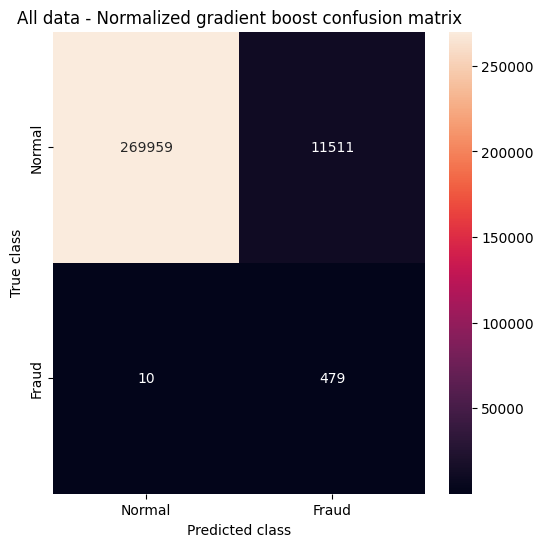

In [49]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_gb_norm_all = confusion_matrix(y_test_norm_all, y_pred_gb_all_norm)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_gb_norm_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Normalized gradient boost confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


#### ADA Boost Classifier

##### Regular Data ADA Boost Classifier

In [50]:
abmodel = AdaBoostClassifier()

In [51]:
# Create a pipeline for each model
adaboost = Pipeline([
    ('model', abmodel)
    ])

# Perform cross-validation
scores_ab = cross_val_score(adaboost, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy_ab = scores_ab.mean()

# Fit the pipeline on the training data
start = process_time()
adaboost.fit(X_train, y_train)
end = process_time()
ab_clf_time = end - start

# Make predictions on the test data
y_pred_ab = adaboost.predict(X_test)

# Calculate accuracy score
accuracy_ab = accuracy_score(y_test, y_pred)

print("Model:", AdaBoostClassifier())
print("Fit runtime:", ab_clf_time)
print("Cross-validation Accuracy:", mean_accuracy_ab)
print("Test Accuracy:", accuracy_ab)
print('Recall Score: ', recall_score(y_test, y_pred_ab))
print('Precision Score: ', precision_score(y_test, y_pred_ab))
print('F1 Score: ', f1_score(y_test, y_pred_ab))

best_ab = adaboost

# save the best model
import pickle
pickle.dump(best_ab, open('regular_ab.dot', 'wb'))

Model: AdaBoostClassifier()
Fit runtime: 0.2696860759999993
Cross-validation Accuracy: 0.9364266709667015
Test Accuracy: 0.9289340101522843
Recall Score:  0.9081632653061225
Precision Score:  0.9270833333333334
F1 Score:  0.9175257731958762


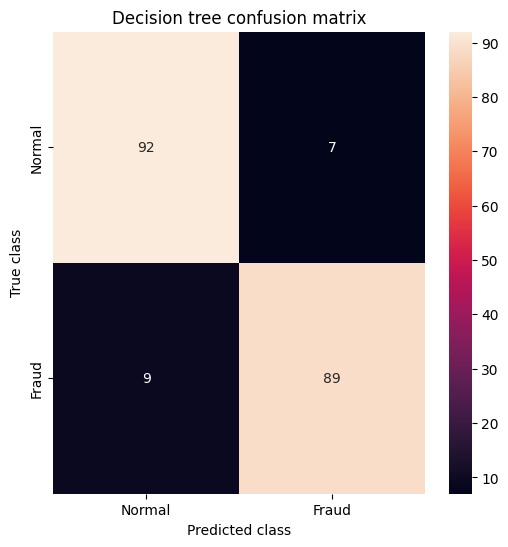

In [52]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_ab, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Decision tree confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [53]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_ab_all = adaboost.predict(X_test_all)

# Calculate accuracy score
accuracy_ab_all = accuracy_score(y_test_all, y_pred_ab_all)

print("Model:", AdaBoostClassifier())
print("Test Accuracy:", accuracy_ab_all)
print('Recall Score: ', recall_score(y_test_all, y_pred_ab_all))
print('Precision Score: ', precision_score(y_test_all, y_pred_ab_all))
print('F1 Score: ', f1_score(y_test_all, y_pred_ab_all))


Model: AdaBoostClassifier()
Test Accuracy: 0.9518937150436766
Recall Score:  0.9754601226993865
Precision Score:  0.034000997932853376
F1 Score:  0.06571153051384489


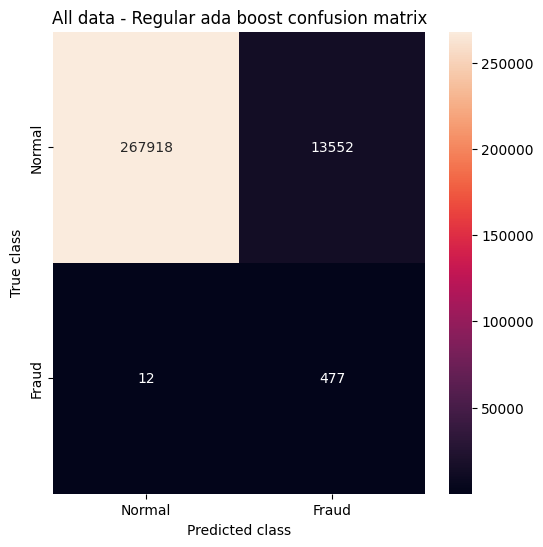

In [54]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_norm_all = confusion_matrix(y_test_all, y_pred_ab_all)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_norm_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Regular ada boost confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

##### Normalized Data ADA Boost Classifier

In [55]:
# Create a pipeline for each model
adaboostNorm = Pipeline([
    ('model', abmodel)
    ])

# Perform cross-validation
scores_ab_norm = cross_val_score(adaboostNorm, X_train_norm, y_train_norm, cv=5)

# Calculate mean accuracy
mean_accuracy_ab_norm = scores_ab_norm.mean()

# Fit the pipeline on the training data
start = process_time()
adaboostNorm.fit(X_train_norm, y_train_norm)
end = process_time()
ab_clf_time_norm = end - start

# Make predictions on the test data
y_pred_ab_norm = adaboostNorm.predict(X_test_norm)

# Calculate accuracy score
accuracy_ab_norm = accuracy_score(y_test_norm, y_pred_norm)

print("Model:", AdaBoostClassifier())
print("Fit runtime:", ab_clf_time_norm)
print("Cross-validation Accuracy:", mean_accuracy_ab_norm)
print("Test Accuracy:", accuracy_ab_norm)
print('Recall Score: ', recall_score(y_test_norm, y_pred_ab_norm))
print('Precision Score: ', precision_score(y_test_norm, y_pred_ab_norm))
print('F1 Score: ', f1_score(y_test_norm, y_pred_ab_norm))

best_ab_norm = adaboostNorm

# save the best model
import pickle
pickle.dump(best_ab_norm, open('norm_ab.dot', 'wb'))

Model: AdaBoostClassifier()
Fit runtime: 0.3651654860000022
Cross-validation Accuracy: 0.9250100782068855
Test Accuracy: 0.9238578680203046
Recall Score:  0.8775510204081632
Precision Score:  0.945054945054945
F1 Score:  0.91005291005291


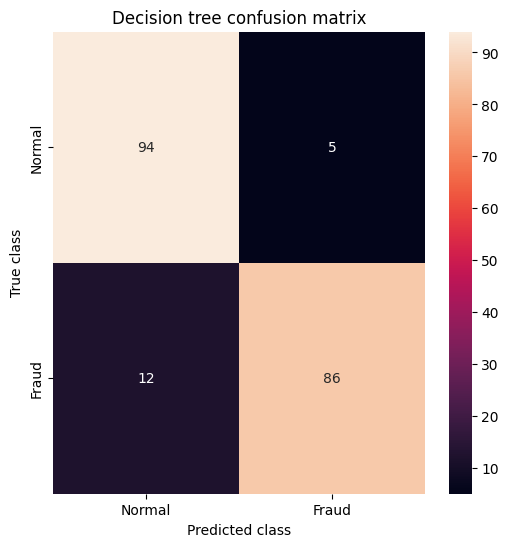

In [56]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_ab_norm = confusion_matrix(y_test_norm, y_pred_ab_norm)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_ab_norm, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Decision tree confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [57]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_ab_all_norm = adaboostNorm.predict(X_test_norm_all)

# Calculate accuracy score
accuracy_ab_all_norm = accuracy_score(y_test_norm_all, y_pred_ab_all_norm)

print("Model:", AdaBoostClassifier())
print("Test Accuracy:", accuracy_ab_all)
print('Recall Score: ', recall_score(y_test_norm_all, y_pred_ab_all_norm))
print('Precision Score: ', precision_score(y_test_norm_all, y_pred_ab_all_norm))
print('F1 Score: ', f1_score(y_test_norm_all, y_pred_ab_all_norm))

Model: AdaBoostClassifier()
Test Accuracy: 0.9518937150436766
Recall Score:  0.9713701431492843
Precision Score:  0.0352190998739527
F1 Score:  0.06797366914710934


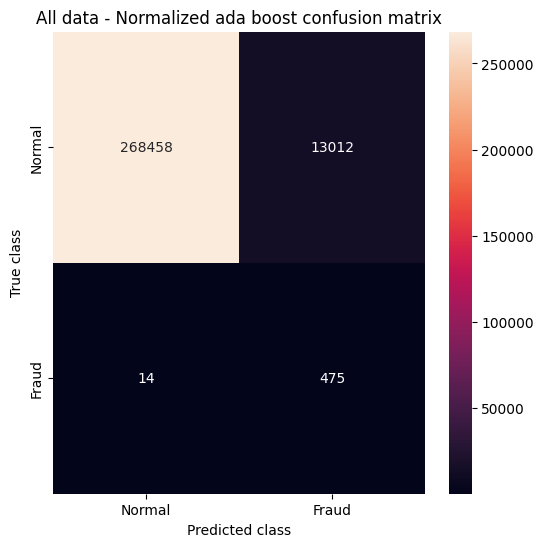

In [58]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_ab_norm_all = confusion_matrix(y_test_norm_all, y_pred_ab_all_norm)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_ab_norm_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Normalized ada boost confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### XG Boost Classifier

##### Regular Data XG Boost Classifier

In [59]:
xgbmodel = XGBClassifier()

In [60]:
# Create a pipeline for each model
xgboost = Pipeline([
    ('model', xgbmodel)
    ])

# Perform cross-validation
scores_xgb = cross_val_score(xgboost, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy_xgb = scores_xgb.mean()

# Fit the pipeline on the training data
start = process_time()
xgboost.fit(X_train, y_train)
end = process_time()
xgb_clf_time = end - start

# Make predictions on the test data
y_pred_xgb = xgboost.predict(X_test)

# Calculate accuracy score
accuracy_xgb = accuracy_score(y_test, y_pred)

print("Model:", XGBClassifier())
print("Fit runtime:", xgb_clf_time)
print("Cross-validation Accuracy:", mean_accuracy_xgb)
print("Test Accuracy:", accuracy_xgb)
print('Recall Score: ', recall_score(y_test, y_pred_xgb))
print('Precision Score: ', precision_score(y_test, y_pred_xgb))
print('F1 Score: ', f1_score(y_test, y_pred_xgb))

best_xgb = xgboost

# save the best model
import pickle
pickle.dump(best_xgb, open('regular_xgb.dot', 'wb'))

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Fit runtime: 0.30827759799999654
Cross-validation Accuracy: 0.9364266709667015
Test Accuracy: 0.9289340101522843
Recall Score:  0.8979591836734694
Precision Score:  0.967032967032967
F1 Score:  0.9312169312169313


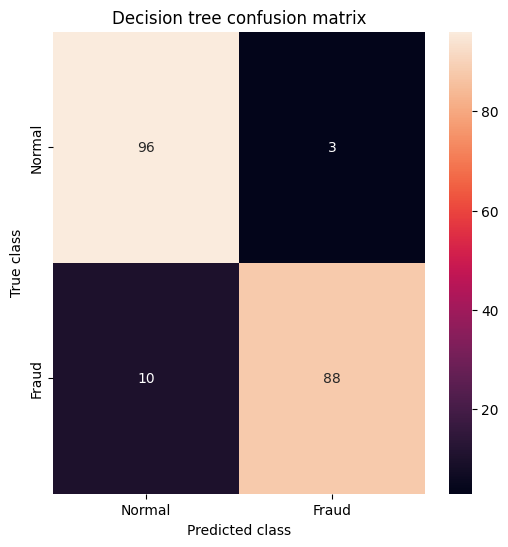

In [61]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_xgb, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Decision tree confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [62]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_xgb_all = xgboost.predict(X_test_all)

# Calculate accuracy score
accuracy_xgb_all = accuracy_score(y_test_all, y_pred_xgb_all)

print("Model:", XGBClassifier())
print("Test Accuracy:", accuracy_xgb_all)
print('Recall Score: ', recall_score(y_test_all, y_pred_xgb_all))
print('Precision Score: ', precision_score(y_test_all, y_pred_xgb_all))
print('F1 Score: ', f1_score(y_test_all, y_pred_xgb_all))

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Test Accuracy: 0.9621115126667352
Recall Score:  0.9795501022494888
Precision Score:  0.0429519368723099
F1 Score:  0.08229533545228074


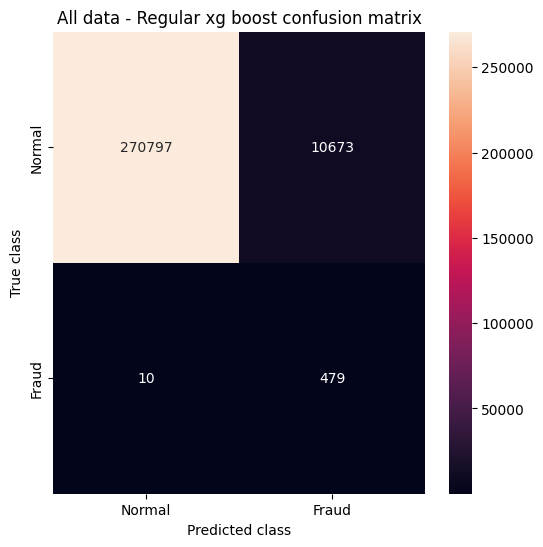

In [63]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_norm_all = confusion_matrix(y_test_all, y_pred_xgb_all)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_norm_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Regular xg boost confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

##### Normalized Data XG Boost Classifier

In [64]:
# Create a pipeline for each model
xgboostNorm = Pipeline([
    ('model', xgbmodel)
    ])

# Perform cross-validation
scores_xgb_norm = cross_val_score(xgboostNorm, X_train_norm, y_train_norm, cv=5)

# Calculate mean accuracy
mean_accuracy_xgb_norm = scores_xgb_norm.mean()

# Fit the pipeline on the training data
start = process_time()
xgboostNorm.fit(X_train_norm, y_train_norm)
end = process_time()
xgb_clf_time_norm = end - start

# Make predictions on the test data
y_pred_xgb_norm = xgboostNorm.predict(X_test_norm)

# Calculate accuracy score
accuracy_xgb_norm = accuracy_score(y_test_norm, y_pred_norm)

print("Model:", XGBClassifier())
print("Fit runtime:", xgb_clf_time_norm)
print("Cross-validation Accuracy:", mean_accuracy_xgb_norm)
print("Test Accuracy:", accuracy_xgb_norm)
print('Recall Score: ', recall_score(y_test_norm, y_pred_xgb_norm))
print('Precision Score: ', precision_score(y_test_norm, y_pred_xgb_norm))
print('F1 Score: ', f1_score(y_test_norm, y_pred_xgb_norm))

best_xgb_norm = xgboostNorm

# save the best model
import pickle
pickle.dump(best_xgb_norm, open('norm_xgb.dot', 'wb'))

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Fit runtime: 0.28585196900000653
Cross-validation Accuracy: 0.9339111505280979
Test Accuracy: 0.9238578680203046
Recall Score:  0.8877551020408163
Precision Score:  0.9354838709677419
F1 Score:  0.9109947643979057


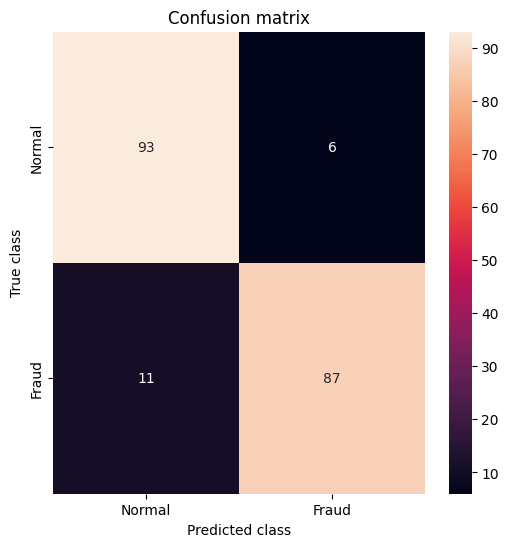

In [65]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_xgb_norm = confusion_matrix(y_test_norm, y_pred_xgb_norm)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_xgb_norm, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [66]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_xgb_all_norm = xgboostNorm.predict(X_test_norm_all)

# Calculate accuracy score
accuracy_xgb_all_norm = accuracy_score(y_test_norm_all, y_pred_xgb_all_norm)

print("Model:", XGBClassifier())
print("Test Accuracy:", accuracy_xgb_all)
print('Recall Score: ', recall_score(y_test_norm_all, y_pred_xgb_all_norm))
print('Precision Score: ', precision_score(y_test_norm_all, y_pred_xgb_all_norm))
print('F1 Score: ', f1_score(y_test_norm_all, y_pred_xgb_all_norm))

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Test Accuracy: 0.9621115126667352
Recall Score:  0.9775051124744376
Precision Score:  0.03980348072279124
F1 Score:  0.07649223875820131


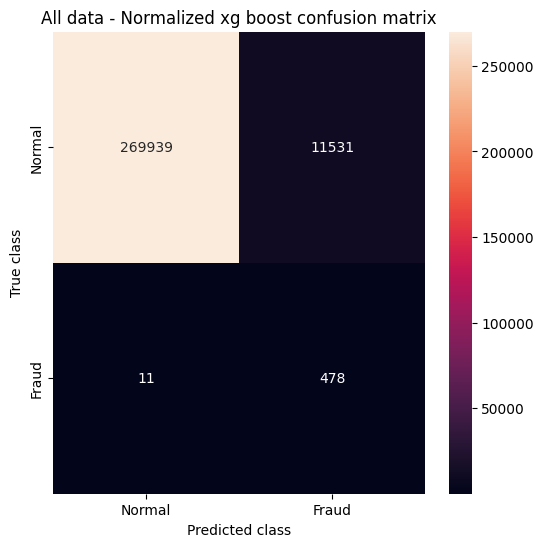

In [67]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_xgb_norm_all = confusion_matrix(y_test_norm_all, y_pred_xgb_all_norm)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_xgb_norm_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Normalized xg boost confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

#### Light Gradient Boost Model Classifier (LGBM)

#### Regular Data LGBM Classifier

In [68]:
import lightgbm
callbacks = [lightgbm.early_stopping(10, verbose=0), lightgbm.log_evaluation(period=0)]

In [69]:
param = {'objective': 'binary', "is_unbalance": 'true',
         'metric': 'average_precision'}
lgbmodel = lightgbm.sklearn.LGBMClassifier(**param)

In [70]:
# Create a pipeline for each model
lgboost = Pipeline([
    ('model', lgbmodel)
    ])

# Perform cross-validation
scores_lgb = cross_val_score(lgboost, X_train, y_train, cv=5)

# Calculate mean accuracy
mean_accuracy_lgb = scores_lgb.mean()

# Fit the pipeline on the training data
start = process_time()
lgboost.fit(X_train, y_train)
end = process_time()
lgb_clf_time = end-start

# Make predictions on the test data
y_pred_lgb = lgboost.predict(X_test)

# Calculate accuracy score
accuracy_lgb = accuracy_score(y_test, y_pred)

print("Model:", LGBMClassifier())
print("Fit runtime:", lgb_clf_time)
print("Cross-validation Accuracy:", mean_accuracy_lgb)
print("Test Accuracy:", accuracy_lgb)
print('Recall Score: ', recall_score(y_test, y_pred_lgb))
print('Precision Score: ', precision_score(y_test, y_pred_lgb))
print('F1 Score: ', f1_score(y_test, y_pred_lgb))

best_lgb = lgboost

# save the best model
import pickle
pickle.dump(best_lgb, open('regular_lgb.dot', 'wb'))


[LightGBM] [Info] Number of positive: 315, number of negative: 314
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6293
[LightGBM] [Info] Number of data points in the train set: 629, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500795 -> initscore=0.003180
[LightGBM] [Info] Start training from score 0.003180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

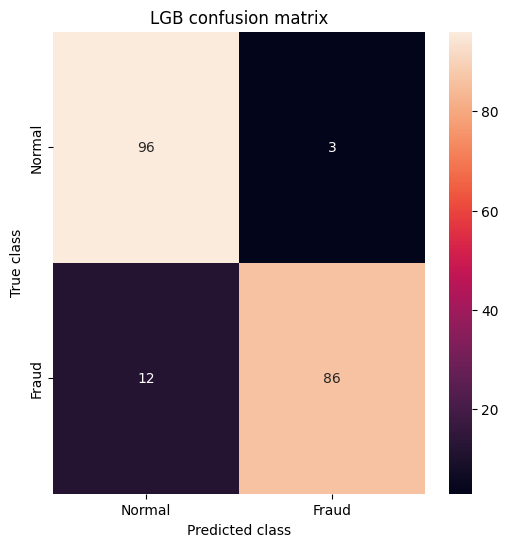

In [71]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_lgb, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("LGB confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [72]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_lgb_all = lgboost.predict(X_test_all)

# Calculate accuracy score
accuracy_lgb_all = accuracy_score(y_test_all, y_pred_lgb_all)

print("Model:", LGBMClassifier())
print("Test Accuracy:", accuracy_lgb_all)
print('Recall Score: ', recall_score(y_test_all, y_pred_lgb_all))
print('Precision Score: ', precision_score(y_test_all, y_pred_lgb_all))
print('F1 Score: ', f1_score(y_test_all, y_pred_lgb_all))

Model: LGBMClassifier()
Test Accuracy: 0.9679315077724067
Recall Score:  0.9754601226993865
Precision Score:  0.05017355632691701
F1 Score:  0.09543817527010803


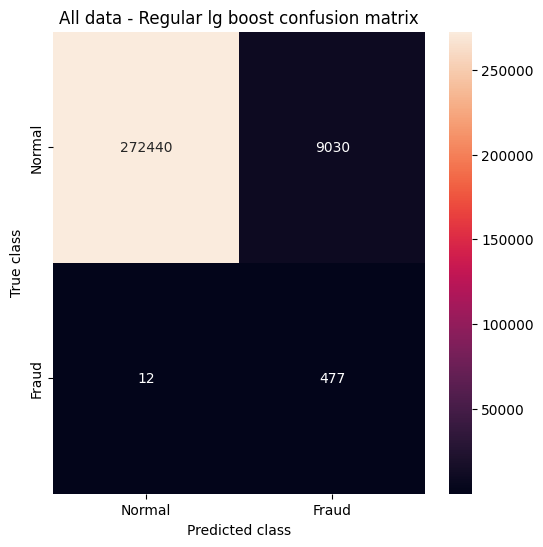

In [73]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_norm_all = confusion_matrix(y_test_all, y_pred_lgb_all)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_norm_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Regular lg boost confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


#### Normalized Data LGBM Classifier

In [74]:
# Create a pipeline for each model
lgboostNorm = Pipeline([
    ('model', lgbmodel)
    ])

# Perform cross-validation
scores_lgb_norm = cross_val_score(lgboostNorm, X_train_norm, y_train_norm, cv=5)

# Calculate mean accuracy
mean_accuracy_lgb_norm = scores_lgb_norm.mean()

# Fit the pipeline on the training data
start = process_time()
lgboostNorm.fit(X_train_norm, y_train_norm)
end = process_time()
lgb_clf_time_norm = end-start

# Make predictions on the test data
y_pred_lgb_norm = lgboostNorm.predict(X_test_norm)

# Calculate accuracy score
accuracy_lgb_norm = accuracy_score(y_test_norm, y_pred_norm)

print("Model:", LGBMClassifier())
print("Fit runtime:", lgb_clf_time)
print("Cross-validation Accuracy:", mean_accuracy_lgb)
print("Test Accuracy:", accuracy_lgb)
print('Recall Score: ', recall_score(y_test, y_pred_lgb))
print('Precision Score: ', precision_score(y_test, y_pred_lgb))
print('F1 Score: ', f1_score(y_test, y_pred_lgb))

best_lgb_norm = lgboostNorm

# save the best model
import pickle
pickle.dump(best_lgb_norm, open('norm_lgb.dot', 'wb'))

[LightGBM] [Info] Number of positive: 315, number of negative: 314
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6294
[LightGBM] [Info] Number of data points in the train set: 629, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500795 -> initscore=0.003180
[LightGBM] [Info] Start training from score 0.003180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

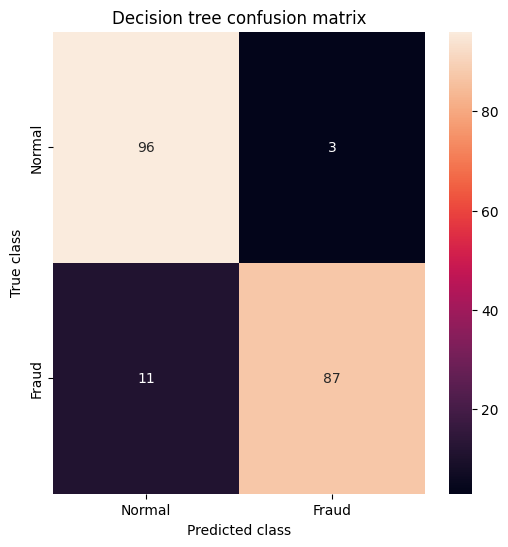

In [75]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_lgb_norm = confusion_matrix(y_test_norm, y_pred_lgb_norm)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_lgb_norm, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Decision tree confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [76]:
# We will use the previous pipeline

# Make predictions on the test data
y_pred_lgb_all_norm = lgboostNorm.predict(X_test_norm_all)

# Calculate accuracy score
accuracy_lgb_all_norm = accuracy_score(y_test_norm_all, y_pred_lgb_all_norm)

print("Model:", LGBMClassifier())
print("Test Accuracy:", accuracy_lgb_all)
print('Recall Score: ', recall_score(y_test_norm_all, y_pred_lgb_all_norm))
print('Precision Score: ', precision_score(y_test_norm_all, y_pred_lgb_all_norm))
print('F1 Score: ', f1_score(y_test_norm_all, y_pred_lgb_all_norm))

Model: LGBMClassifier()
Test Accuracy: 0.9679315077724067
Recall Score:  0.9775051124744376
Precision Score:  0.051742801472180126
F1 Score:  0.09828312943353552


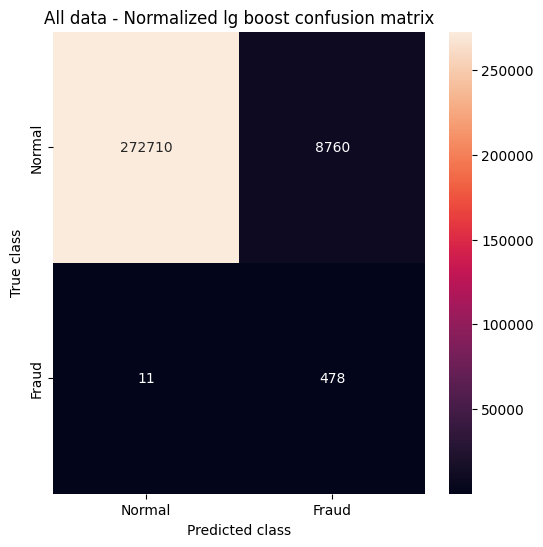

In [77]:
# Visulalizing the confusion matrix and metrics
LABELS = ['Normal', 'Fraud']
from sklearn.metrics import confusion_matrix
conf_matrix_lgb_norm_all = confusion_matrix(y_test_norm_all, y_pred_lgb_all_norm)
plt.figure(figsize =(6, 6))
sns.heatmap(conf_matrix_lgb_norm_all, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("All data - Normalized lg boost confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## Discussion

### Metrics

#### Model Accuracy Metric

From the experiments that has been done, we get this ranking with F1 score as its metric,

1. XG Boost: 0.9211058475
2. Gradient Boosting: 0.9215670145
3. Random Forest: 0.922683052
4. Ada Boost: 0.9137893415
5. LG Boost (LGBM): 0.919786096
6. Decision Tree: 0.89190051

#### Computational Performance Metric
From the experiments that has been done, we get this ranking with fit runtime as its metric,


1.   Decision Tree: 0.026377087 seconds
2.   XG Boost: 0.2970647835 seconds
3.   ADA Boost: 0.317425781 seconds
4.   LG Boost (LGBM): 0.472362293 seconds
5.   Random Forest: 0.487674825 seconds
6.   Gradient Boost: 1.0892285185 seconds

### Normalized vs Not Normalized

In this unbalanced dataset, it is implied that normalization only **improves the runtime speed of the algorithms involved by approximately 31.44%**

### Effect of Sampling
By doing multiple experiments with different randomization seeds, it can be seen that sampling affects the accuracy of the model when tested with all data within the dataset.

## Conclusion
From the conducted experiments, it's evident that XG Boost and Gradient Boosting exhibit the highest F1 scores, indicating robust performance in model accuracy, closely followed by Random Forest and LGBM. However, when considering computational efficiency, Decision Tree emerges as the top performer with significantly lower fit runtime. This suggests that Decision Tree may be preferable for scenarios prioritizing computational performance over slightly lower accuracy metrics. Additionally, the findings underline the impact of normalization, primarily enhancing runtime efficiency across algorithms by around 31.44%. Moreover, the experiments reveal the influence of sampling on model accuracy, highlighting its significance in optimizing model performance when applied across various datasets.